In [1]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import feature
from skimage import data

import cv2
import imutils

from tensorflow import keras
from tensorflow.keras.datasets import mnist     
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

from numpy import argmax
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

(512, 512)
(140, 120)


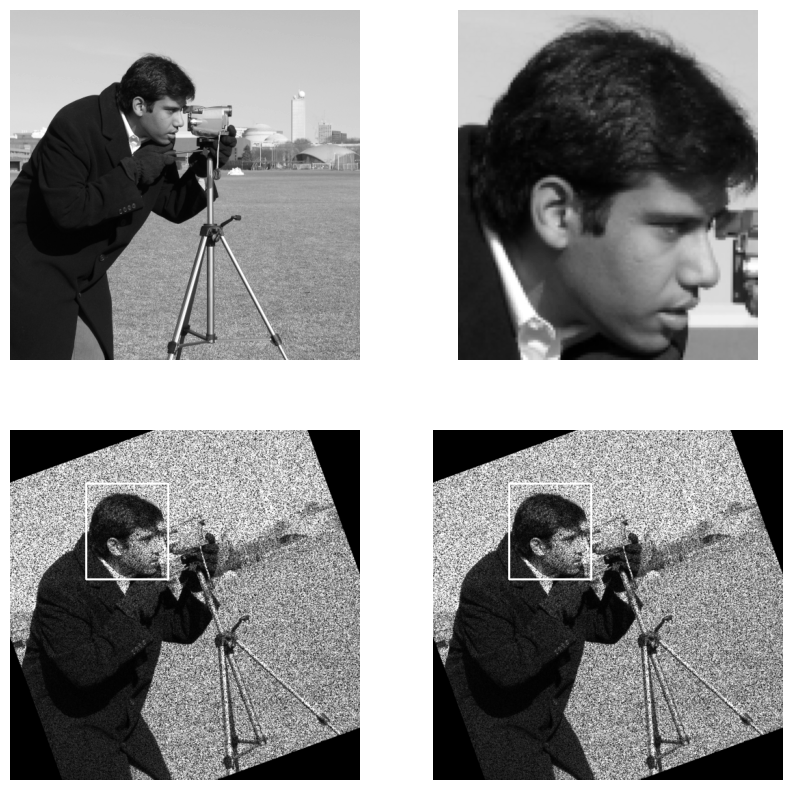

In [5]:
image = data.camera()

img = np.copy(image)

template = (image[60:200, 150:270]).astype(np.float32)

noise =  np.random.normal(loc=0, scale=1, size=img.shape)
noisy = (np.clip(img * (1 + noise * 0.5), 0, 255)).astype(np.float32)

print(noisy.shape)
print(template.shape)

deformated = imutils.rotate(noisy, angle=20)

match_item = cv2.matchTemplate(deformated, template, method=cv2.TM_CCOEFF)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match_item) 

w, h = template.shape[::-1]
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(deformated, top_left, bottom_right, 255, 2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(image, cmap='gray')
ax2.imshow(template, cmap='gray')
ax3.imshow(deformated, cmap='gray')
ax4.imshow(deformated, cmap='gray')

plt.show()

In [15]:


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255



y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print(x_test[:, :, :, 0])

model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])


(10000, 28, 28)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 

In [17]:
# print(model.summary())     

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

[0.032019175589084625, 0.9894999861717224]

In [7]:
# model.save('my_model')

new_mod = keras.models.load_model('./my_model')

new_mod.summary()

loss, acc = new_mod.evaluate(x_test, y_test_cat)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [27]:

def load_image(filename):
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 
 img = img_to_array(img)
 img = img.reshape(1, 28, 28, 1)
 img = img.astype('float32')
 img = img / 255.0
 return img
 
img = load_image('sample_image.png')
model = load_model('./my_model')
predict_value = model.predict(img)
digit = argmax(predict_value)



c:\Users\droni\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


(28, 28, 1)
0.0
1/1 [==============================] - 0s 52ms/step
